In [87]:
# Importing necessary libraries and modules from TensorFlow, NumPy, and Matplotlib.

import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [88]:
# Load the CIFAR-10 dataset
# CIFAR-10 dataset is loaded into training and testing sets. This dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class.

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

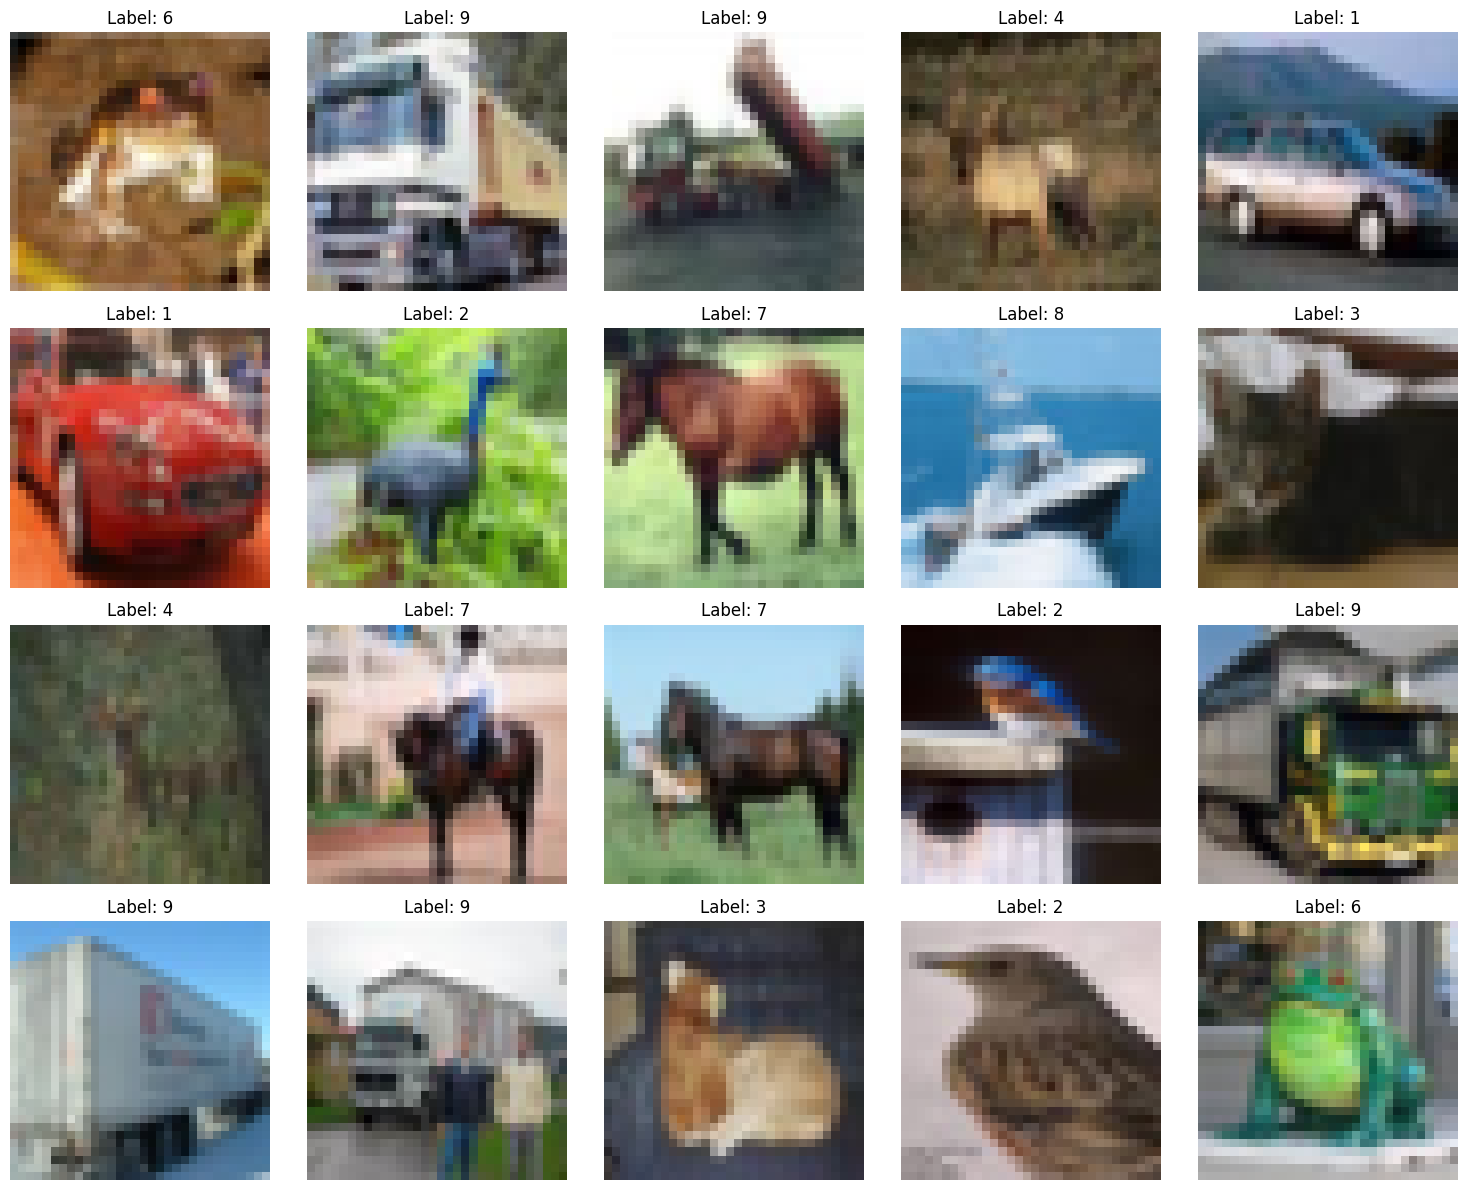

In [76]:
# Visualize the first 20 images from the dataset
# Creating a figure with subplots to display 20 images from the dataset, allowing us to visually verify the data and understand the variety of images.

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 12))
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 12))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

for image_index in range(20):
    # Display the image
    ax = axes[image_index]  # Get the corresponding axes object
    ax.imshow(x_train[image_index])
    ax.set_title(f'Label: {y_train[image_index][0]}')
    ax.axis('off')  # Turn off axis numbers and ticks

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [89]:
# Data Preprocessing
# Function to normalize the image data to the range 0-1 to help with the performance and efficiency of the neural network.

def normalize(images):

    # Normalize pixel values
    images = images.astype('float32')/ 255.0

    return images

In [90]:
x_train = normalize(x_train)
x_test = normalize(x_test)

# One-hot encoding the labels for the neural network.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Maximum pixel value after normalization: {np.max(x_train)}\n")
print(f"Shape of training set: {x_train.shape}\n")

Maximum pixel value after normalization: 1.0

Shape of training set: (50000, 32, 32, 3)



In [91]:
# Define the CNN model architecture
# This section defines the layout of the Convolutional Neural Network using several layers including convolutional, max pooling, flatten, and dense layers.

model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model specifying the optimizer, loss function, and metrics to evaluate during training.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [92]:
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.90:
                print("\nReached 90% accuracy so cancelling training!")

                # Stop training once the above condition is met
                self.model.stop_training = True

In [93]:
# Model training
# Employing callbacks such as myCallback monitor training performance and stop training once the accuracy condition is met

callback = myCallback()
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=callback,
)

Epoch 1/50
782/782 [==============================] - 236s 300ms/step - loss: 1.4642 - accuracy: 0.4680 - val_loss: 1.1054 - val_accuracy: 0.6139
Epoch 2/50
782/782 [==============================] - 222s 284ms/step - loss: 1.0469 - accuracy: 0.6296 - val_loss: 0.8932 - val_accuracy: 0.6892
Epoch 3/50
782/782 [==============================] - 220s 281ms/step - loss: 0.8666 - accuracy: 0.6964 - val_loss: 0.8251 - val_accuracy: 0.7108
Epoch 4/50
782/782 [==============================] - 230s 294ms/step - loss: 0.7524 - accuracy: 0.7361 - val_loss: 0.7822 - val_accuracy: 0.7281
Epoch 5/50
782/782 [==============================] - 222s 284ms/step - loss: 0.6686 - accuracy: 0.7651 - val_loss: 0.7331 - val_accuracy: 0.7487
Epoch 6/50
782/782 [==============================] - 223s 285ms/step - loss: 0.5951 - accuracy: 0.7919 - val_loss: 0.6858 - val_accuracy: 0.7669
Epoch 7/50
782/782 [==============================] - 220s 281ms/step - loss: 0.5261 - accuracy: 0.8138 - val_loss: 0.6932 -

In [94]:
# Evaluate the model
# The final model evaluation on the test data, providing insights into the model's generalization ability on unseen data.

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 14s 43ms/step - loss: 0.8133 - accuracy: 0.7739
Test accuracy: 0.7738999724388123
